## 1 K-Means Clustering (20 points)

In this problem, you will solve a clustering task using the k-means algorithm on a TCGA pan-cancer gene expression dataset that contains a combination of multiple types of cancer. The dataset has been transformed for the purpose of this task, and is located in “tcga_pancancer/pancancer.csv". Each entry has fifteen features, and your task is to find the number of cancer types in this dataset.

1. A reasonable first step in every machine learning task is to understand the dataset at hand. Proceed to explore this problem’s dataset by addressing the following :

(a) Choose a suitable type of plot and visualize the first two features of the data. (4 points) 
(b) From your plot, how many clusters, k, do you recognize in the dataset? (2 point)

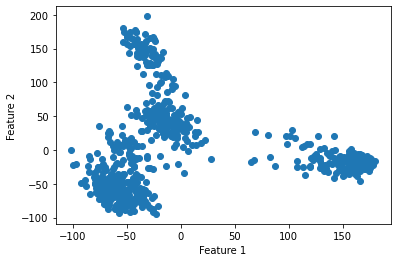

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("tcga_pancancer/pancancer.csv", index_col = 0)

# Plot first two features
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

There are four noticable clusters from plotting the first two features.

2.
(a) Using the k-Means algorithm, implement a clustering model. Train the clustering model using all 15 features from the data. Try with several reasonable values of k based on your visual inspection from 1.1(b). Calculate and plot the Bayesian information criterion (BIC) and Akaike information criterion (AIC) for each value of k. You may use Scikit- learn. (10 points)


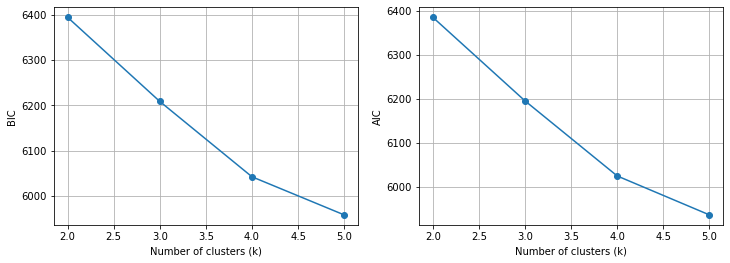

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Set the range of k values to try
k_values = range(2, 6)

# Initialize lists to store the BIC and AIC scores for each value of k
bic_scores = []
aic_scores = []

# Train the clustering model for each value of k and calculate the BIC and AIC scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data)
    #.score gives log likelihood https://stats.stackexchange.com/questions/398780/understanding-the-log-likelihood-score-in-scikit-learn-gmm
    bic = data.shape[0] * np.log(kmeans.inertia_/(data.shape[0]))+ k* np.log(data.shape[0])
    aic = data.shape[0] * np.log(kmeans.inertia_/(data.shape[0])) +2*k
    bic_scores.append(bic)
    aic_scores.append(aic)

# Plot the BIC and AIC scores for each value of k
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(k_values, bic_scores, 'o-', label='BIC')
ax[0].set_xlabel('Number of clusters (k)')
ax[0].set_ylabel('BIC')
ax[0].grid(True)
ax[1].plot(k_values, aic_scores, 'o-', label='AIC')
ax[1].set_xlabel('Number of clusters (k)')
ax[1].set_ylabel('AIC')
ax[1].grid(True)
plt.show()

(b) Which value of k is optimal? How does it compare to your visual inspection from 1.1b? (2 point)

A k of 5 is optimal, which is more clusters than can be seen by viewing the first two variables

(c) Plot the clustering result with the optimal k (use the first two principal components as x and y axis). (2 point)

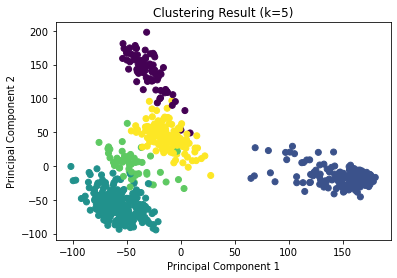

In [3]:
from sklearn.decomposition import PCA
# Fit PCA model to data
pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)

# Fit KMeans model with optimal k
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
labels = kmeans.labels_

# Plot clustering result
plt.scatter(data_pca[:,0], data_pca[:,1], c=labels)
plt.title("Clustering Result (k=5)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## 2 K-Nearest Neighbor Classification (20 points)

In this problem, you will utilize data from the Red Wine Quality dataset from the folder “wine”. The data has been separated into train.csv, val.csv, and test.csv. Each entry has the following features: ‘fixed acidity’, ‘volatile acidity’, ‘citric acid’, ‘residual sugar’, ‘chlorides’, ‘free sulfur dioxide’, ‘total sulfur dioxide’, ‘density’, ‘pH’, ‘sulphates’, and ‘alcohol’, and the binary outcome variable ‘good quality’ indicating the quality of the wine. Your task is to classify the quality of wine in the test dataset.

#### 1. Train an k-Nearest Neighbors algorithm on the training dataset of your choice of k’s (k is the number of neighbors in kNN). (6 points)

In [4]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier


def train_knn_models(data, k_values):
    """
    Train k-NN models for each value of k in k_values and return a list of trained models.
    """
    data = pd.read_csv(data)
    
    # Split the dataset into features and target variable
    X_train = data.drop("good_quality", axis=1)
    y_train = data["good_quality"]
    #scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    # Train k-NN models for each value of k
    knn_models = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        knn_models.append(knn)
    
    return knn_models

In [5]:
knn_models = train_knn_models('wine/train.csv',[1,2, 3,4,5,6 ,7,8, 9])

#### 2. Report the classification accuracy of this model on the validation set for different values for k. Plot these accuracies against k and report the optimal value for k. (8 points)

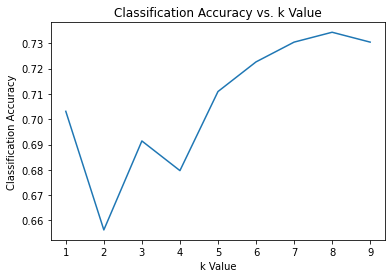

Optimal k value: 8


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the validation dataset
val_data = pd.read_csv("wine/val.csv")


# Split good qual from rest of data
X_val = val_data.drop("good_quality", axis=1)
y_val = val_data["good_quality"]


#scale data
scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)
X_val = pd.DataFrame(X_val_scaled, columns=X_val.columns)
# Use same k values
k_values = [1,2, 3,4,5,6 ,7,8, 9]

# Calculate the classification accuracy for each k value
accuracies = []
for k in k_values:
    knn = knn_models[k_values.index(k)]
    y_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Plot the classification accuracies against k values
plt.plot(k_values, accuracies)
plt.title("Classification Accuracy vs. k Value")
plt.xlabel("k Value")
plt.ylabel("Classification Accuracy")
plt.show()

# Find the optimal k value that gives the highest classification accuracy
optimal_k = k_values[accuracies.index(max(accuracies))]
print("Optimal k value:", optimal_k)

#### 3. Report the classification accuracy and confusion matrix of this model on the data in test.csv using the optimal value of k that you found in 2.2. (6 points)

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Load the test dataset
test_data = pd.read_csv("wine/test.csv")



#Separate good quality
X_test = test_data.drop("good_quality", axis=1)
y_test = test_data["good_quality"]

#scale data
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Found optimal k was 8
optimal_k = 8

# Use the k-NN model with the optimal k value to make predictions on the test data
knn = knn_models[k_values.index(optimal_k)]
y_pred = knn.predict(X_test)

# Calculate the classification accuracy and confusion matrix for the k-NN model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Classification Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)


Classification Accuracy: 0.728125
Confusion Matrix:
[[110  38]
 [ 49 123]]


### 3 Decision Tree Classification (20 points)

#### With the Titanic data:
1. Preprocess the data with techniques of your choice. Explain the reasons for the chosen data preprocessing techniques in the comments. (4 points)


In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def preprocess_data(file_path):
    data = pd.read_csv(file_path)
    #only want letter of cabin
    data['Cabin'] = data['Cabin'].str.extract(r'([a-zA-Z]+)', expand=False)
    
    #convert sex to binary
    data["Sex"] = data["Sex"].map({"male": 0, "female": 1})
    
    #use one-hot encoding for unordered categorical variables. This is because we do not
    #want to assign values to these variables as they dont have any real value
    categorical_cols = ["Embarked", "Title",'Cabin']
    encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
    data_encoded = pd.DataFrame(encoder.fit_transform(data[categorical_cols]))
    
    #set column names of encoded features
    data_encoded.columns = encoder.get_feature_names(categorical_cols)
    
    preprocessed = pd.concat([data.drop(categorical_cols, axis=1), data_encoded], axis=1)
   
    return preprocessed
    
    

In [9]:
train_data = preprocess_data('titanic/train.csv')
train_data.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         1       1    1   24      0      0  69.3000         1.0         0.0   
1         0       3    1    3      3      1  21.0750         0.0         0.0   
2         1       3    1   16      0      0   7.7333         0.0         1.0   
3         1       3    0   32      0      0  56.4958         0.0         0.0   
4         0       3    0   22      0      0   7.1250         0.0         0.0   

   Embarked_S  ...  Title_Rare  Cabin_A  Cabin_B  Cabin_C  Cabin_D  Cabin_E  \
0         0.0  ...         0.0      0.0      1.0      0.0      0.0      0.0   
1         1.0  ...         0.0      0.0      0.0      0.0      0.0      0.0   
2         0.0  ...         0.0      0.0      0.0      0.0      0.0      0.0   
3         1.0  ...         0.0      0.0      0.0      0.0      0.0      0.0   
4         1.0  ...         0.0      0.0      0.0      0.0      0.0      0.0   

   Cabin_F  Cabin_G  Cabin_T  Cabin_nan  
0      0.0      0.0      0.0        0.0  
1      0.0      0.0      0.0        1.0  
2      0.0      0.0      0.0        1.0  
3      0.0      0.0      0.0        1.0  
4      0.0      0.0      0.0        1.0  

[5 rows x 25 columns]

#### Decision Trees Classification
(a) Initialize a binary decision tree model for the training data. (Hint: you may find Deci-
sionTreeClassifier from Scikit-learn useful). (2 point)

In [10]:
from sklearn.tree import DecisionTreeClassifier


# Split the dataset into features and target variable
X_train = train_data.drop("Survived", axis=1)
y_train = train_data["Survived"]

# Initialize a decision tree model
clf = DecisionTreeClassifier(random_state=1)

# Train the decision tree model on the training dataset
model = clf.fit(X_train, y_train)

#### (b) You can improve a decision tree model by tuning some hyperparameters for terminating the splitting process. Tune the maximum depth of the tree (e.g. from 1 to 10) and report the accuracy of the classifier in 3.2a on the validation set for different settings of maximum depth. Plot your findings and report the optimum maximum depth you found. (8 points)

Max depth = 1, accuracy = 0.792
Max depth = 2, accuracy = 0.856
Max depth = 3, accuracy = 0.848
Max depth = 4, accuracy = 0.824
Max depth = 5, accuracy = 0.800
Max depth = 6, accuracy = 0.800
Max depth = 7, accuracy = 0.824
Max depth = 8, accuracy = 0.808
Max depth = 9, accuracy = 0.784
Max depth = 10, accuracy = 0.776


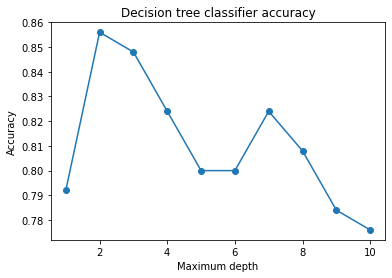

Optimum maximum depth: 2


In [11]:
#load in and preprocess val data
val_data = preprocess_data('titanic/val.csv')

# Split the dataset into features and target variables
X_val = val_data.drop('Survived', axis=1)
y_val = val_data['Survived']

#xval didn't have some columns from x train so added a column of zeros
missing_cols = set(X_train.columns) - set(X_val.columns)
for c in missing_cols:
    X_val[c] = 0
X_val = X_val[X_train.columns]

# Initialize the decision tree classifier with default hyperparameters


# Define a range of maximum depth values to try
max_depth_values = range(1, 11)

# Train the decision tree classifier with different maximum depth values and evaluate its performance
accuracies = []
for max_depth in max_depth_values:
    clf.set_params(max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)
    print('Max depth = {}, accuracy = {:.3f}'.format(max_depth, acc))

# Plot the accuracy scores against the maximum depth values
plt.plot(max_depth_values, accuracies, 'o-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree classifier accuracy')
plt.show()

# Find the optimum maximum depth value
optimum_max_depth = max_depth_values[accuracies.index(max(accuracies))]
print(f'Optimum maximum depth: {optimum_max_depth}')

### (c) Train a decision tree classifier using the optimum setting of maximum depth found in 3.2b on all data from the training and validation set. Predict the outcomes on the testing data, and submit your prediction result (0’s and 1’s) in a .csv file named “Your- NetID_dt_prediction.csv". (6 points)

In [12]:
#preprocess test data
test_data = preprocess_data('titanic/test.csv')

missing_cols = set(X_train.columns) - set(test_data.columns)
for c in missing_cols:
    test_data[c] = 0
test_data = test_data[X_train.columns]

X_trainval = pd.concat([X_train,X_val],axis = 0)
y_trainval = pd.concat([y_train,y_val],axis = 0)

clf = DecisionTreeClassifier(random_state=1)
clf.set_params(max_depth=2)
clf.fit(X_trainval, y_trainval)
preds = clf.predict(test_data)


In [13]:
np.savetxt('f006mjr_dt_prediction.csv', preds, delimiter=',',header = '',fmt = '%d')

### 4 Random Forsest Classification (20 pts)

In this problem, you will build a random forest classifier to predict the passengers’ survival in Titanic dataset.
1. Initialize a random forest classifier. (Hint: you may find RandomForestClassifier from Scikit- learn useful.) (2 points)

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the random forest classifier
rf = RandomForestClassifier(random_state = 1)

2. Optimize your classifier by tuning two hyperparameters to maximize the accuracy of your model: the maximum depth of the tree, and the number of trees in the random forest classifier. Validate the model by using 10-fold cross-validation on entire data combining training and validation set (Hint: you might find ParameterGrid and GridSearchCV in the Scikit-learn library useful). Report the optimum parameters you found. (8 points)

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'n_estimators': [20, 50, 100, 200,500], 
              'max_depth': [3, 5, 7, 9,11]}



# Perform a 10-fold cross validation grid search
grid_search = GridSearchCV(rf, param_grid, cv=10, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_trainval, y_trainval)

# Print the best parameters
print('Best parameters: ', grid_search.best_params_)


Best parameters:  {'max_depth': 7, 'n_estimators': 200}


3. Report and interpret the feature importance of each feature by your random forest model. The feature importance in a random forest can be indicated by the sum of the reduction in Gini Impurity over all the nodes that are split on that feature. (6 points)

In [16]:
# Initialize the classifier with the best hyperparameters
rf = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=1)

# Fit the model on the training data
rf.fit(X_trainval, y_trainval)

# Get feature importance scores and feature names
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a dictionary of feature importance scores and feature names
importance_dict = dict(zip(feature_names, importances))

# Sort the dictionary by importance score in descending order
sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))

# Print the sorted feature importance scores and feature names
for feature, importance in sorted_importance_dict.items():
    print(feature, round(importance,3))

Title_Mr 0.163
Sex 0.152
Fare 0.121
Age 0.099
Pclass 0.08
Title_Mrs 0.075
Title_Miss 0.062
Cabin_nan 0.047
SibSp 0.046
Parch 0.035
Embarked_S 0.018
Cabin_E 0.017
Embarked_C 0.017
Title_Master 0.014
Cabin_B 0.013
Embarked_Q 0.012
Cabin_C 0.008
Title_Rare 0.007
Cabin_D 0.006
Cabin_F 0.003
Cabin_G 0.003
Cabin_A 0.002
Cabin_T 0.0
Embarked_nan 0.0


Looking at the sorted feature importances, the top two important features were Mr. and Sex. This indicates that the sex of the person is important in predicting if the person survived. The passenger fare, age, and ticket class also were important in predicting if the person survived. The number of siblings, spouses, parents or children were moderately important in the model, and the cabin type and embarked type were the least important in the model although not having a cabin was moderately important.


4. Predict the survivals on testing data using the classifier with the optimum parameters from 4.2. Predict the outcomes on titanic/test.csv, and submit your prediction result (0’s and 1’s) in a .csv file named “YourNetID_rf_prediction.csv". (4 points)

In [17]:
pred = rf.predict(test_data)
np.savetxt('f006mjr_rf_prediction.csv', preds, delimiter=',',fmt = '%d',header = '')

## 5 SVM classification (20 points)

In this problem, you will train an SVM classifier to predict passengers survival in Titanic.
1. Build SVM classifiers with the following three kernels: linear, polynomial with degree = 2, and radial basis function kernel. Train the classifiers and calculate the performance of each classifier on the validation set. (Hint: You may find SVC and Kernel functions from Scikit- learn useful.) (15 points)

In [18]:
#scale numerical varaibles
scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_val[['Age', 'Fare']] = scaler.fit_transform(X_val[['Age', 'Fare']])
test_data[['Age', 'Fare']] = scaler.fit_transform(test_data[['Age', 'Fare']])

In [19]:
from sklearn.svm import SVC
# Initialize SVM classifiers with different kernels
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly', degree=2)
svm_rbf = SVC(kernel='rbf')

# Fit the SVM classifiers on the training data
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_linear = svm_linear.predict(X_val)
y_pred_poly = svm_poly.predict(X_val)
y_pred_rbf = svm_rbf.predict(X_val)

# Calculate accuracy scores on the validation data
acc_linear = accuracy_score(y_val, y_pred_linear)
acc_poly = accuracy_score(y_val, y_pred_poly)
acc_rbf = accuracy_score(y_val, y_pred_rbf)

# Print the accuracy scores
print('Accuracy score of linear SVM:', acc_linear)
print('Accuracy score of polynomial SVM:', acc_poly)
print('Accuracy score of RBF SVM:', acc_rbf)

Accuracy score of linear SVM: 0.84
Accuracy score of polynomial SVM: 0.84
Accuracy score of RBF SVM: 0.848


2. Which kernel gives the best result? Use your classifier with the this kernel to predict the survival outcomes in the testing set. Save your prediction (0’s and 1’s) in a .csv file named “YourNetID_svm_prediction.csv". (5 points)

In [20]:
#RBF SVM gives best result
pred = svm_rbf.predict(test_data)
np.savetxt('f006mjr_svm_prediction.csv', preds, delimiter=',',fmt = '%d',header = '')